# Read, Analyze and Compare data between DSJM and Conte 

### Date: 15 August 2020

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dist_df = pd.read_csv('dist.csv')
import re

# number of rows in the csv file
count = len(dist_df.M)
# count= int(dist_df.Count[0])

# reding columns from the csv file
conte=dist_df.Conte
slo=dist_df.SLO
lfo=dist_df.LFO
ido=dist_df.IDO

# declare a DF to store the result. Later we hshall download this file
df_result = pd.DataFrame(columns = ['F_Name' , 'M' , 'N' , 'Sp_conte', 'Sp_slo', 'Sp_lfo', 'Sp_ido', 'Sp_Rt_slo_conte', 'Sp_Rt_lfo_conte', 'Sp_Rt_ido_conte', 'CR_conte', 'CR_slo', 'CR_lfo','CR_ido']) 

# This loop process one row at a time (data of one input file)
for index in range(count):
    M = dist_df.M[index]
    N = dist_df.N[index]
    # reading file name.
    FileName = dist_df.Fname[index]
    # print(FileName)
    
    # For SLO
    # These three line extract clique distribution from our printed format
    x= re.split(',|]\[|\[|]',slo[index])
    del x[0]   # removes empty value
    del x[-1]  # removes empty value
    # size in odd position of the list x
    odd = x[0::2]
    # count is in even position of list x
    even = x[1::2]
    clique_size_slo = np.array(odd)
    clique_count_slo = np.array(even)
    # Converting string to integer
    clique_size_slo = clique_size_slo.astype(np.int)
    clique_count_slo = clique_count_slo.astype(np.int)
    # Bitwise mult then sum gives total space required by this method
    S_slo  = np.sum(clique_size_slo * clique_count_slo)
    
    # For LFO
    x= re.split(',|]\[|\[|]',lfo[index])
    del x[0]
    del x[-1]
    odd = x[0::2]
    even = x[1::2]
    clique_size_lfo = np.array(odd)
    clique_count_lfo= np.array(even)    
    clique_size_lfo = clique_size_lfo.astype(np.int)
    clique_count_lfo = clique_count_lfo.astype(np.int)
    S_lfo  = np.sum(clique_size_lfo * clique_count_lfo)
    
    # For IDO
    x= re.split(',|]\[|\[|]',ido[index])
    del x[0]
    del x[-1]
    odd = x[0::2]
    even = x[1::2]
    clique_size_ido = np.array(odd)
    clique_count_ido= np.array(even)
    clique_size_ido = clique_size_ido.astype(np.int)
    clique_count_ido = clique_count_ido.astype(np.int)
    S_ido  = np.sum(clique_size_ido * clique_count_ido)
    
    # For Conte
    x= re.split(',|]\[|\[|]',conte[index])
    del x[0]
    del x[-1]
    odd = x[0::2]
    even = x[1::2]
    clique_size_conte = np.array(odd)
    clique_count_conte= np.array(even)
    clique_size_conte = clique_size_conte.astype(np.int)
    clique_count_conte = clique_count_conte.astype(np.int)
    S_conte= np.sum(clique_size_conte * clique_count_conte)
    
    # Space required as a collection of cliques
    # S_slo = Space required for DSJM using SLO
    # R_SC = Ratio of required Space between DSJM using SLO and Conte's algorithm
    R_SC= S_slo /S_conte
    R_LC= S_lfo /S_conte
    R_IC= S_ido /S_conte
    
    # CR_x = 2*num_of_edge / space required as a collection of cliques using x algorithm
    CR_slo = (2*M) / S_slo
    CR_lfo = (2*M) / S_lfo
    CR_ido = (2*M) / S_ido
    CR_conte = (2*M) / S_conte

    df_result = df_result.append({'F_Name' : FileName, 'M' : M, 'N' : N, 'Sp_conte' : S_conte, 'Sp_slo' : S_slo, 'Sp_lfo' : S_lfo, 'Sp_ido' : S_ido, 'Sp_Rt_slo_conte' : R_SC, 'Sp_Rt_lfo_conte': R_LC, 'Sp_Rt_ido_conte' : R_IC, 'CR_conte': CR_conte, 'CR_slo' : CR_slo, 'CR_lfo' : CR_lfo, 'CR_ido' : CR_ido},   ignore_index = True) 
# print(df_result)
df_result.to_csv('result_analysis.csv')

# Different Techniques of Calculation

In [3]:
our = 'Our Algorithm'
conte = 'Conte\'s Algorithm'
method1= 'SLO'
method2= 'LFO'
method3= 'IDO'

## Insert file name and insert Clique Distribution

In [4]:
FileName = 'er_n2'
M=2000

clique_size_slo = np.array([2,3,4,5])
clique_count_slo= np.array([1000, 500, 30, 10])

clique_size_lfo = np.array([2,3,4])
clique_count_lfo= np.array([1000, 500, 30])

clique_size_ido = np.array([2,3,4])
clique_count_ido= np.array([1000, 500, 30])

clique_size_conte = np.array([2,3,4])
clique_count_conte= np.array([1200, 700, 30])

# No input required below

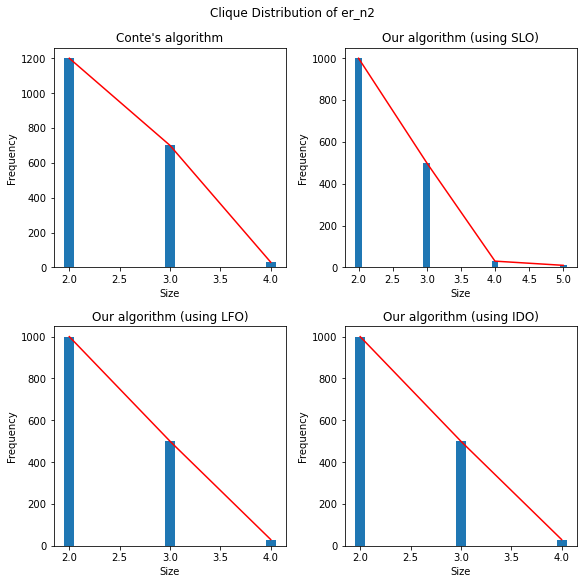

In [5]:
title = 'Clique Distribution of '+FileName
subtitle1= 'Our algorithm (using '+method1+')'
subtitle2= 'Our algorithm (using '+method2+')'
subtitle3= 'Our algorithm (using '+method3+')'
subtitle4= 'Conte\'s algorithm'

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8),constrained_layout=True)
fig.suptitle(title)


ax[0, 0].bar(clique_size_conte, clique_count_conte, width =0.1)
ax[0, 0].plot(clique_size_conte,clique_count_conte,color='red')
ax[0, 0].set_title(subtitle4)

ax[0, 1].bar(clique_size_slo, clique_count_slo, width =0.1)
ax[0, 1].plot(clique_size_slo,clique_count_slo,color='red')
ax[0, 1].set_title(subtitle1)

ax[1, 0].bar(clique_size_lfo, clique_count_lfo, width =0.1)
ax[1, 0].plot(clique_size_lfo,clique_count_lfo,color='red')
ax[1, 0].set_title(subtitle2)

ax[1, 1].bar(clique_size_ido, clique_count_ido, width =0.1)
ax[1, 1].plot(clique_size_ido,clique_count_ido,color='red')
ax[1, 1].set_title(subtitle3)


for a in ax.flat:
    a.set(xlabel='Size', ylabel='Frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for a in ax.flat:
#    a.label_outer()
# fig.tight_layout()

# Minimum number of non-zero used to represent the graph
## Space required as a collection of cliques

* S_slo = Space required for DSJM using SLO
* S_lfo = Space required for DSJM using LFO
* S_ido = Space required for DSJM using IDO
* S_conte = Space required for Conte's algorithm

* R_SC = Ratio of required Space between DSJM using SLO and Conte's algorithm
* R_LC = Ratio of required Space between DSJM using LFO and Conte's algorithm
* R_IC = Ratio of required Space between DSJM using IDO and Conte's algorithm

In [6]:
len(clique_size_slo)
S_slo  = np.sum(clique_size_slo * clique_count_slo)
S_lfo  = np.sum(clique_size_lfo * clique_count_lfo)
S_ido  = np.sum(clique_size_ido * clique_count_ido)
S_conte= np.sum(clique_size_conte * clique_count_conte)


R_SC= S_slo /S_conte
R_LC= S_lfo /S_conte
R_IC= S_ido /S_conte

print(R_SC)
print(R_LC)
print(R_IC)

0.7943722943722944
0.7835497835497836
0.7835497835497836


## Compression Ratio
* CR_x = 2*num_of_edge  / space required as a collection of cliques using x algorithm 

In [7]:
CR_slo = (2*M) / S_slo
CR_lfo = (2*M) / S_lfo
CR_ido = (2*M) / S_ido
CR_conte = (2*M) / S_conte

print(CR_slo)
print(CR_lfo)
print(CR_ido)
print(CR_conte)


1.0899182561307903
1.1049723756906078
1.1049723756906078
0.8658008658008658


# Plot Edges vs Times (sec)

## Insert input file name. But upload it first!!

In [17]:
df = pd.read_csv('plotData.csv')

## No need to give input for plotting below this point

* Caption: Time used by algorithms to compute clique covers for 180 graphs as a function of the number of edges.

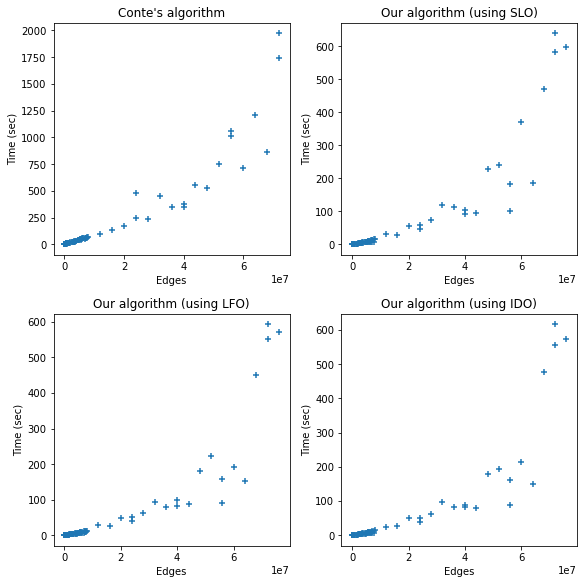

In [26]:
subtitle1= 'Our algorithm (using '+method1+')'
subtitle2= 'Our algorithm (using '+method2+')'
subtitle3= 'Our algorithm (using '+method3+')'
subtitle4= 'Conte\'s algorithm'

x = df.M
y1 = df.DSJM_slo
y2 = df.DSJM_lfo
y3 = df.DSJM_ido
y4 = df.Conte

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8),constrained_layout=True)


ax[0, 0].scatter(x, y4, marker = '+')
ax[0, 0].set_title(subtitle4)
a, b = np.polyfit(x, y4, 1)   # m = slope, b=intercept


ax[0, 1].scatter(x, y1, marker = '+')
ax[0, 1].set_title(subtitle1)

ax[1, 0].scatter(x, y2, marker = '+')
ax[1, 0].set_title(subtitle2)

ax[1, 1].scatter(x, y3, marker = '+')
ax[1, 1].set_title(subtitle3)

for a in ax.flat:
    a.set(xlabel='Edges', ylabel='Time (sec)')

* Caption: Time used by algorithms to compute clique covers for 180 graphs as a function of the number of edges.

In [10]:
df = pd.read_csv('PlotTimeCompare.csv')

M = df.M
t_conte= df.Conte
t_slo  = df.DSJM_slo
t_lfo  = df.DSJM_lfo
t_ido  = df.DSJM_ido



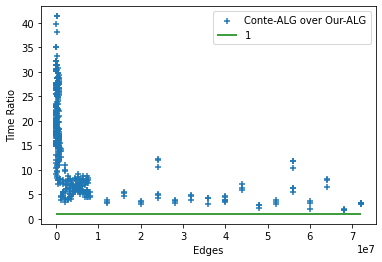

In [11]:
fig, ax = plt.subplots()

x=[]
y=[]
for i in range (len(t_slo)):
    if t_slo[i] != 0:
        ratio=t_conte[i]/t_slo[i]
        x.append(M[i])
        y.append(ratio)
for i in range (len(t_lfo)):
    if t_lfo[i] != 0:
        ratio=t_conte[i]/t_lfo[i]
        x.append(M[i])
        y.append(ratio)
for i in range (len(t_ido)):
    if t_ido[i] != 0:
        ratio=t_conte[i]/t_ido[i]
        x.append(M[i])
        y.append(ratio)
        
ax.scatter(x, y, marker = '+',label='Conte-ALG over Our-ALG')

plt.xlabel('Edges')
plt.ylabel('Time Ratio')
plt.hlines(1, 0, max(M), colors='g', linestyles='solid', label='1', )
ax.legend()
plt.show()
